In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import keras
from tensorflow.keras.utils import to_categorical


%matplotlib inline

In [6]:
audio_data = []
labels = []
sampling_rate = []
filenames = []

In [31]:
data, sampling_rate = librosa.load("ESC-50-master/audio/1-62594-A-32.wav", sr = 44000)
# 4-183882-A-28
# 5-157204-B-16
# 1-19501-A-7
# 1-62594-A-32
print(data.shape)
print(sampling_rate)

(220000,)
44000


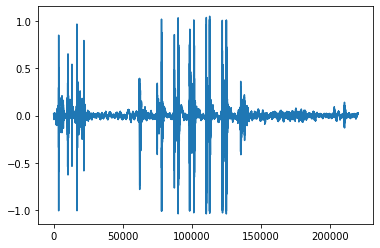

In [32]:
plt.plot(data)
plt.show()

In [33]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
print(freq.shape)

(1025, 430)


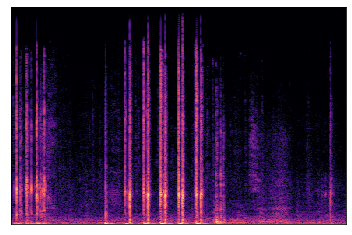

In [34]:
librosa.display.specshow(freq)

/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


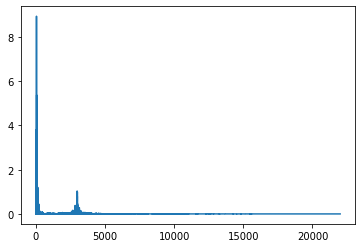

In [35]:
n = data.shape[0]
fhat = np.fft.fft(data,n) # compute FFT
PSD = fhat * np.conj(fhat) /n # power spectrum per frequency
freq = np.fft.fftfreq(len(data), 1/sampling_rate)
L = np.arange(1, np.floor(n/2), dtype='int')
plt.plot(freq[L], PSD[L])
plt.show()